# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
#loading the train data set
train_df = pd.read_csv('df_train.csv')
# loading the test data set
test_df = pd.read_csv('df_test.csv')

In [3]:
# combining them into one data set for cleaning purposes
frames = [train_df, test_df]
combined_df = pd.concat(frames)

<a id="four"></a>
## 4. Data Engineering And Exploratory Data Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

Overview of the first five and last five contents of the combined data set

In [4]:
# first five rows
combined_df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [5]:
#last five rows
combined_df.tail()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,...,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN


We now correct the indexing because it is somewhat wrong. 

In [6]:
# set the first column to be the index
combined_df = combined_df.set_index('Unnamed: 0')

In [7]:
# another look at the data set
combined_df.tail()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,...,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,...,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN
11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.0,...,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN
11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.0,...,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,0.0,...,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN


In [8]:
combined_df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


So it's looking good right now.

Let's find out what data types the features have. We want only numerical data types for the regression model.

In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 11682
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  11683 non-null  object 
 1   Madrid_wind_speed     11683 non-null  float64
 2   Valencia_wind_deg     11683 non-null  object 
 3   Bilbao_rain_1h        11683 non-null  float64
 4   Valencia_wind_speed   11683 non-null  float64
 5   Seville_humidity      11683 non-null  float64
 6   Madrid_humidity       11683 non-null  float64
 7   Bilbao_clouds_all     11683 non-null  float64
 8   Bilbao_wind_speed     11683 non-null  float64
 9   Seville_clouds_all    11683 non-null  float64
 10  Bilbao_wind_deg       11683 non-null  float64
 11  Barcelona_wind_speed  11683 non-null  float64
 12  Barcelona_wind_deg    11683 non-null  float64
 13  Madrid_clouds_all     11683 non-null  float64
 14  Seville_wind_speed    11683 non-null  float64
 15  Barcelona_rain_1h  

We can see from above that the dataframe has 3 categorical variables: time, valencia_wind_deg, and Seville_pressure, while the rest are numerical variables consisting of floats or integers. 
As a start, I will deal with the categorical variables first before looking at the numerical variables because in regression, the emphasis is on numerical variables. 

# 4.1 Time Feature - Data Cleaning

In [10]:
# how many rows and colums
combined_df['time'].unique().shape

(11683,)

In [11]:
# Are there missing values
combined_df['time'].isnull().sum()

0

In [12]:
# first five entries
combined_df['time'].head()

Unnamed: 0
0    2015-01-01 03:00:00
1    2015-01-01 06:00:00
2    2015-01-01 09:00:00
3    2015-01-01 12:00:00
4    2015-01-01 15:00:00
Name: time, dtype: object

In [13]:
# last five entries
combined_df['time'].tail()

Unnamed: 0
11678    2018-12-31 09:00:00
11679    2018-12-31 12:00:00
11680    2018-12-31 15:00:00
11681    2018-12-31 18:00:00
11682    2018-12-31 21:00:00
Name: time, dtype: object

The next step is to convert the time to a datetime data type and extract the relevant features

In [14]:
# convert the time variable to a datetime datatype
combined_df['time'] = pd.to_datetime(combined_df['time'])

In [15]:
# extract relevant metrics like year, month, weekday, hour from the time feature
combined_df['Year'] = combined_df['time'].dt.year
# extract month
combined_df['Month'] = combined_df['time'].dt.month
# extract weekday
combined_df['Weekday'] = combined_df['time'].dt.dayofweek
# extract hour from the time feature
combined_df['Hour'] = combined_df['time'].dt.hour



In [16]:
# we now drop the time feature since the relevant metrics have been extracted
combined_df.drop("time", axis=1, inplace=True)
combined_df.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Weekday,Hour
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,3,3
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,3,6


The second categorical feature that needs to be encoded is the Valencia Wind Degree.

In [17]:
# get all the unique values in the feature
combined_df['Valencia_wind_deg'].unique()

array(['level_5', 'level_10', 'level_9', 'level_8', 'level_7', 'level_6',
       'level_4', 'level_3', 'level_1', 'level_2'], dtype=object)

We can see that the feature is made of levels. That means it is an ordinal feature. So, we only need to extract the numerical values from the strings and encode it as the values. Then convert the datatype to int since it will still be an object. 

In [18]:
# encode the Valencia_wind_deg values as numbers
combined_df['Valencia_wind_deg'] = combined_df['Valencia_wind_deg'].str.extract(r'(\d+$)')


In [19]:
# convert the data type to numeric
combined_df["Valencia_wind_deg"] = pd.to_numeric(combined_df["Valencia_wind_deg"])

In [20]:
combined_df["Valencia_wind_deg"].head()

Unnamed: 0
0     5
1    10
2     9
3     8
4     7
Name: Valencia_wind_deg, dtype: int64

The third categorical feature is Seville Pressure

In [21]:
# what unique features are its values
combined_df["Seville_pressure"].unique()

array(['sp25', 'sp23', 'sp24', 'sp21', 'sp16', 'sp9', 'sp15', 'sp19',
       'sp22', 'sp11', 'sp8', 'sp4', 'sp6', 'sp13', 'sp17', 'sp20',
       'sp18', 'sp14', 'sp12', 'sp5', 'sp10', 'sp7', 'sp3', 'sp2', 'sp1'],
      dtype=object)

We can see that the values are ranked. So we need to encode them as numbers. 

In [22]:
# encode the Valencia_wind_deg values as numbers
combined_df['Seville_pressure'] = combined_df['Seville_pressure'].str.extract(r'(\d+$)')


In [23]:
# convert the data type to numeric
combined_df["Seville_pressure"] = pd.to_numeric(combined_df["Seville_pressure"])

Let's find out if any other features are categorical or we are through with encoding.

In [24]:
# let's find out
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 11682
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     11683 non-null  float64
 1   Valencia_wind_deg     11683 non-null  int64  
 2   Bilbao_rain_1h        11683 non-null  float64
 3   Valencia_wind_speed   11683 non-null  float64
 4   Seville_humidity      11683 non-null  float64
 5   Madrid_humidity       11683 non-null  float64
 6   Bilbao_clouds_all     11683 non-null  float64
 7   Bilbao_wind_speed     11683 non-null  float64
 8   Seville_clouds_all    11683 non-null  float64
 9   Bilbao_wind_deg       11683 non-null  float64
 10  Barcelona_wind_speed  11683 non-null  float64
 11  Barcelona_wind_deg    11683 non-null  float64
 12  Madrid_clouds_all     11683 non-null  float64
 13  Seville_wind_speed    11683 non-null  float64
 14  Barcelona_rain_1h     11683 non-null  float64
 15  Seville_pressure   

# 4.2 Missing Values
Right now, there are no categorical variables. The data set is composed solely of numerical features which is needed for the regression model. So let's search for missing values in the data set. 

In [25]:
# searching for missing values or NaN
combined_df.isnull().sum()

Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humid

The output shows that only Valencia_pressure has missing values. The missing values for load_shortfall_3h is because we merged the train and test datasets. When we unmerge them, this will disappear. 

Let's see if the feature has outliers

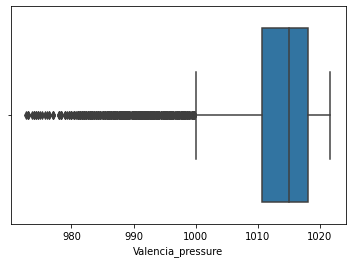

In [26]:
ax = sns.boxplot(x="Valencia_pressure", data=combined_df)

The box plot above shows that the feature has a lot of outliers so we cannot use the mean. Since pressure is somewhat based on high or low levels, it is better to use the mode rather than the median. So we will impute the missing values based on the mode.

In [27]:
# impute missing values using mode
combined_df["Valencia_pressure"].fillna(combined_df["Valencia_pressure"].mode()[0], inplace=True)

Let's see if there are any missing values. 

In [28]:
combined_df.isnull().sum()

Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humid

Missing values is taken care of. 

Now we need to unmerge what we merged. That is, we need to separate the train data set from the test data set. 

In [29]:
# code to separate the test data set
test_clean_df = combined_df[combined_df["load_shortfall_3h"].isnull()]

In [30]:
# drop the response column. It is all nulls
test_clean_df = test_clean_df.drop("load_shortfall_3h", axis=1)

In [31]:
# check what the combined dataframe contains
combined_df.shape

(11683, 51)

It still contains the test data frame. So we need to drop all reference to the test data set to have a single train data set. 

In [32]:
train_clean_df = combined_df[combined_df["load_shortfall_3h"].notnull()]

In [33]:
train_clean_df.shape

(8763, 51)

compare with shape for test

In [34]:
test_clean_df.shape

(2920, 50)

So, we have our data sets backs. We can now move on to modelling phase of the data science project. 

Let's pickle the train and test data so far. So that one can take a break. 

In [35]:
# store the data in a dictionary
dict_store = {"train_clean_df": train_clean_df, "test_clean_df": test_clean_df}


# 4.6 Exploratory Data Analysis

After Data Cleaning is exploratory data analysis (EDA). For the EDA, we will first start with the categorical variables that were encoded as numeric variables. 

## EDA on the time-derived features

The time derived features are year, month, weekday and hour. An EDA of the relationship of these festures with the response variable, load_shortfall_3h, can give us insight about the data and what to expect from the modeling. 

### 4.6.1 Load shortfall by Months

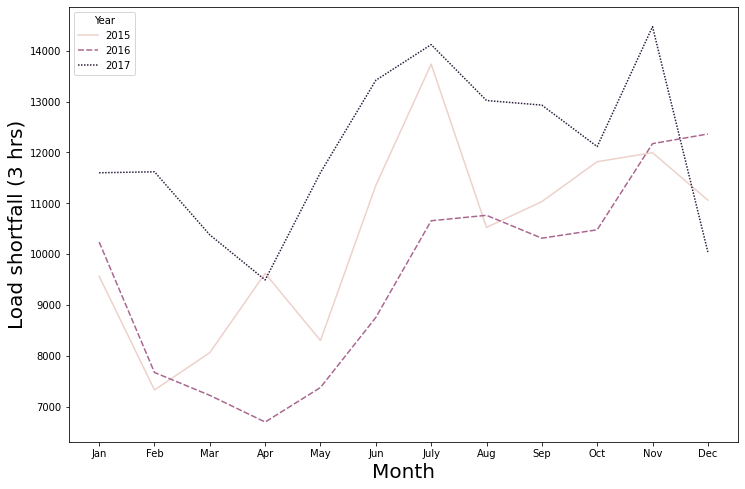

In [48]:
fig, ax = plt.subplots(figsize=(12, 8))
p = sns.lineplot(x='Month', y='load_shortfall_3h', hue='Year', data=train_clean_df, ci=None, style='Year', ax=ax)
p.set_ylabel("Load shortfall (3 hrs)", fontsize=20)
p.set_xlabel("Month", fontsize=20)
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_ticks = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.xticks(ticks=months_ticks, labels=months_labels)
plt.legend(loc="upper left", title='Year', fontsize='medium')
plt.show()

From the graph above, we can see that 2017 has the highest shortfall of the three years. Also, the load shortfall is lower at the beginning of the year while it rises as the year elapses and becomes higher during the summer and winter months. This could be related to the fact that Spain uses a lot of wind energy as renewables and air pressure is lowest during the summer and winter because the temperature is hottest and warm air is less dense than cold air. Also, in winter the low pressure is due to winter time cooling.  

### 4.6.2 Load Shortfall by Weekday.

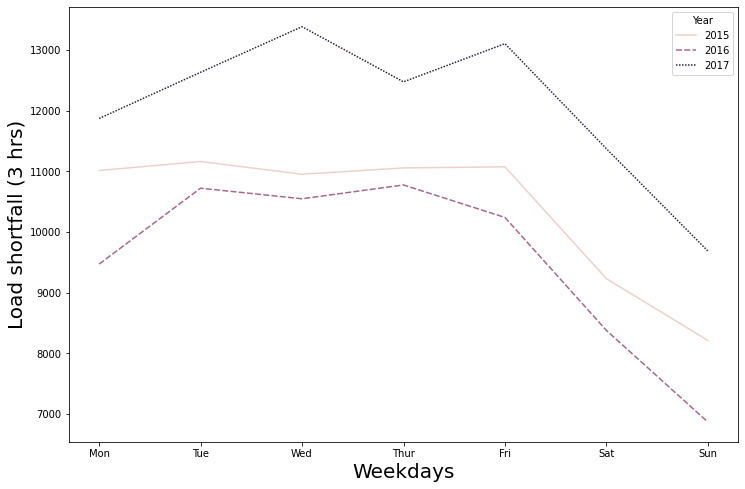

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))
p = sns.lineplot(x='Weekday', y='load_shortfall_3h', hue='Year', data=train_clean_df, ci=None, style='Year', ax=ax)
p.set_ylabel("Load shortfall (3 hrs)", fontsize=20)
p.set_xlabel("Weekdays", fontsize=20)
days_labels = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
days_ticks = [0,1,2,3,4,5,6]
plt.xticks(ticks=days_ticks, labels=days_labels)
plt.show()

We see a trend here. 2017 had the highest shortfall of all the three years. Also, the highest energy shortfalls were recorded during the weekdays, especially at the middle of the week while the weekends had the lowest shortfalls. This is related to the demand for energy by citizens of Spain. During the week, the demand is high when people and factories use energy a lot and then the generation cannot keep up with the demand but during the weekends, the demand tends to reduce.

### 4.6.3 Load shortfall by year and by hour

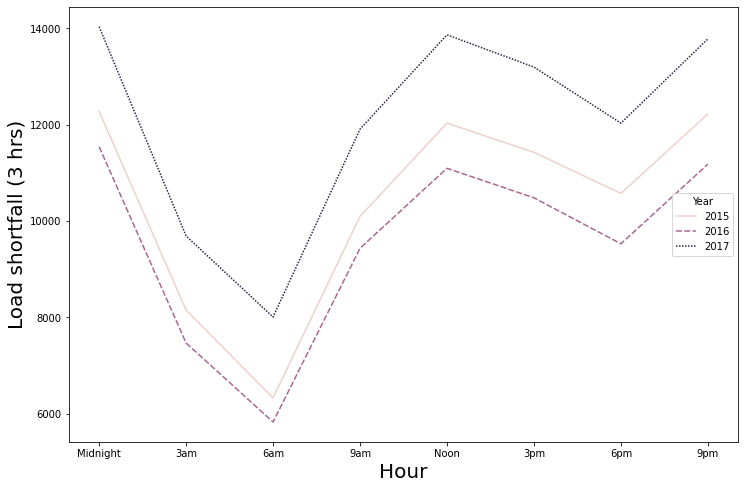

In [56]:
fig, ax = plt.subplots(figsize=(12, 8))
p = sns.lineplot(x='Hour', y='load_shortfall_3h', hue='Year', data=train_clean_df, ci=None, style='Year', ax=ax)
p.set_ylabel("Load shortfall (3 hrs)", fontsize=20)
p.set_xlabel("Hour", fontsize=20)
hours_labels = ['Midnight', '3am', '6am', '9am', 'Noon', '3pm', '6pm', '9pm']
hours_ticks = [0,3, 6, 9, 12, 15, 18, 21]
plt.xticks(ticks=hours_ticks, labels=hours_labels)
plt.legend(loc="center right", title='Year', fontsize='medium')
plt.show()

We see that 2017, as for other patterns, has the highest energy shortfall of all three years. Also, energy shortfall tends to fall during midnight and then it increases gradually as the day progresses. The increase during the day is attributed to the demand by the citizens of Spain for energy. It is more telling when people are at home and they have all their applicances on at the same time. 

### 4.6.4 Load Shortfall in relation to Valencia Wind Degree

c:\Users\emekadavid\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


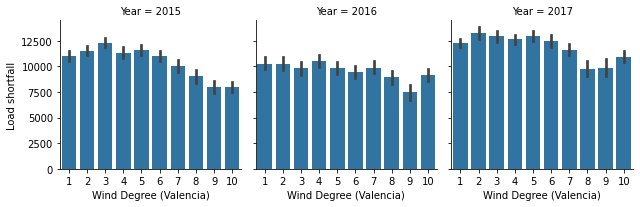

In [63]:
#fig, ax = plt.subplots(figsize=(12,8))
g= sns.FacetGrid(train_clean_df, col="Year")
g.map(sns.barplot, "Valencia_wind_deg", "load_shortfall_3h")
g.set_ylabels("Load shortfall")
g.set_xlabels("Wind Degree (Valencia)")

From the graph, low levels of wind degree have higher levels of shortfalls. The shortfall in relation to wind degree was more prominent in Valencia in 2017.

### 4.6.5 Load Shortfall in relation to Seville Pressure

c:\Users\emekadavid\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


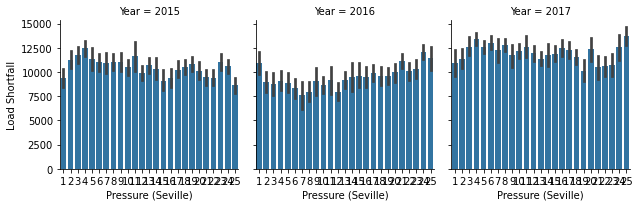

In [62]:
#fig, ax = plt.subplots(figsize=(12,8))
g= sns.FacetGrid(train_clean_df, col="Year")
g.map(sns.barplot, "Seville_pressure", "load_shortfall_3h")
g.set_ylabels("Load Shortfall")
g.set_xlabels("Pressure (Seville)")

We can see from the graph above that extremes of pressure results in higher energy shortfalls in Spain. Low pressures and very high pressures tend to increase the energy shortfall. 

### 4.6.6 Univariate Analysis - Non-graphical
We will be looking at the descriptive statistics of each feature like the mean, standard deviation and five number summary of each feature. The five number summary are the min, max, median, 1st and 3rd quartiles. 

In [79]:
# the five number summary with the mean and standard deviation
train_clean_df.describe()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Weekday,Hour
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,5.276389,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612,2016.000571,6.524820,3.005478,10.498459
std,1.850371,2.877642,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404,0.816054,3.447976,1.999193,6.874031
min,0.000000,1.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000,2015.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333,2015.000000,4.000000,1.000000,4.500000
50%,2.000000,5.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667,2016.000000,7.000000,3.000000,9.000000
75%,3.333333,8.000000,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667,2017.000000,10.000000,5.000000,15.000000
max,13.000000,10.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000,2017.000000,12.000000,6.000000,21.000000


Let's take a measure of skew in the data. We want to see how symmetrical the data is to give us a sense of whether they would follow a normal distribution. 

In [80]:
train_clean_df.skew()

Madrid_wind_speed        1.441144
Valencia_wind_deg        0.088354
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_pressure        -0.086022
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -2.121882
Seville_temp_max        -0.033931
Madrid_pressur

We notice that most of the features are fairly symmetrical. But there are extremes of positive skew like the snow features for Bilbao and Valencia, and the rain features for Seville, Barcelona and Madrid and pressure features for Barcelona. It must be due to extreme weather at these places which could be due to climate change. We expect that there would be high energy shortfalls due to this conditions. 

Now let's look for the presence of outliers in the features. Outlier detection is very important because we need to have standardized ranges for all the features. 

In [81]:
train_clean_df.kurtosis()

Madrid_wind_speed          2.036462
Valencia_wind_deg         -1.186661
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_pressure          -1.220040
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          3

From the output above, it is noticed that less than 20 percent of the features have significant outliers. That is a good start. But that means the data set would have to be standardized to accomodate for these outliers so they do not influence the modeling process. 

### 4.6.7 Univariate Analysis: Graphical

it would be insightful to take a subset of the weather conditions in each of the cities. There are five cities and sometimes three for each weather condition. Let's do the plotting for them. 

#### Wind speed

Spain uses a lot of wind energy so it would be insightful to get a look at the data for wind speed because wind speed determines whether the energy infrastructure can work at full capacity or not. 

array([[<AxesSubplot:title={'center':'Madrid_wind_speed'}>,
        <AxesSubplot:title={'center':'Valencia_wind_speed'}>],
       [<AxesSubplot:title={'center':'Bilbao_wind_speed'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_speed'}>],
       [<AxesSubplot:title={'center':'Seville_wind_speed'}>,
        <AxesSubplot:>]], dtype=object)

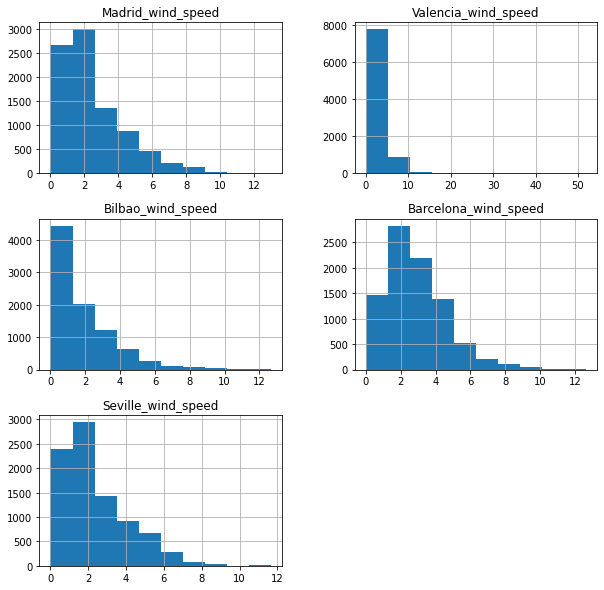

In [82]:
# Histogram of wind speed for five cities: Madrid, Valencia, Bilbao, Barcelona, and Seville
features = ["Madrid_wind_speed", "Valencia_wind_speed", "Bilbao_wind_speed", "Barcelona_wind_speed", "Seville_wind_speed"]
train_clean_df[features].hist(figsize=(10,10))

From the histogram, we see that the means are higher than the modes. Valencia_wind_speed is an encoded feature so ignore it. Also, wind speed is a positively skewed feature. That means, most of the values are concentrated to the right of the mode and tends to be high. 

### Rain 

Since Spain also uses solar energy for energy generation, let's take a look at the histogram for rainfall. Rainfall significantly affects the generation of both wind and solar energy. We could derive some insights from it. 

array([[<AxesSubplot:title={'center':'Barcelona_rain_1h'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_3h'}>],
       [<AxesSubplot:title={'center':'Seville_rain_1h'}>,
        <AxesSubplot:title={'center':'Seville_rain_3h'}>],
       [<AxesSubplot:title={'center':'Bilbao_rain_1h'}>,
        <AxesSubplot:title={'center':'Madrid_rain_1h'}>]], dtype=object)

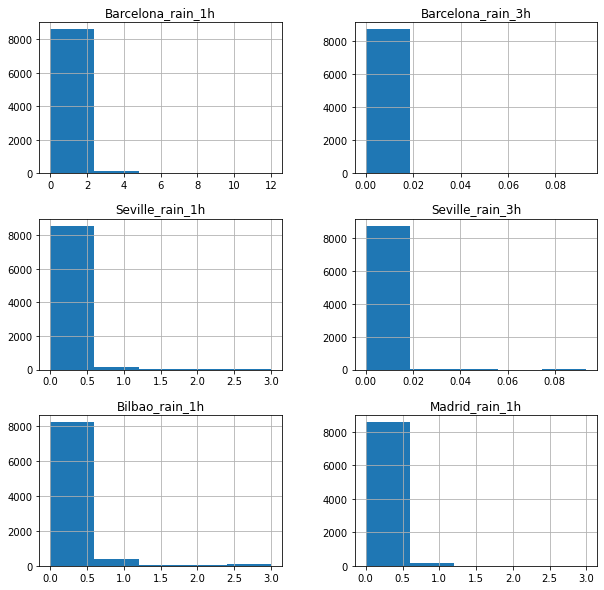

In [83]:
features = ["Barcelona_rain_1h", "Barcelona_rain_3h", "Seville_rain_1h", "Seville_rain_3h", "Bilbao_rain_1h", "Madrid_rain_1h"]
train_clean_df[features].hist(figsize=(10,10), bins=5)

From the histogram, we see that rainfall is constant in all four regions, except for some occasions when there are extremes of rainfall. 

### 4.6.8 Multivariate Analysis - Non-Graphical

We will conduct a non-graphical multivariate analysis because the features are many i.e 51 in number. So we will plot the correlation of the features to the response variable. 

<AxesSubplot:>

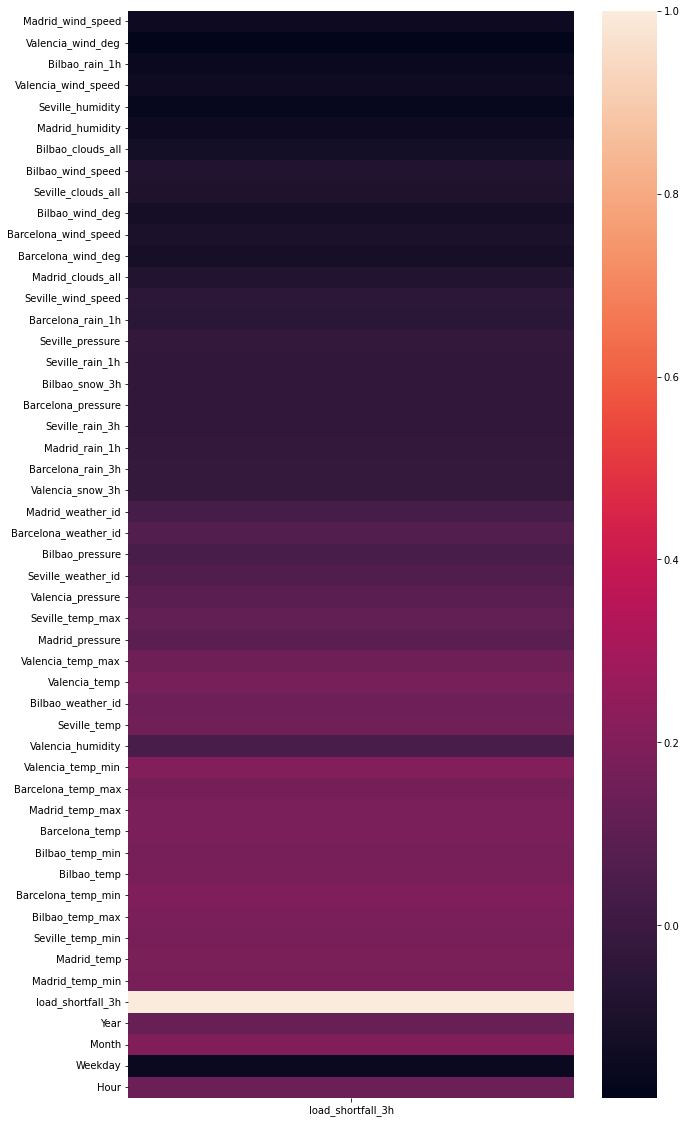

In [80]:
fig, ax = plt.subplots(figsize=(10, 20))
corr = train_clean_df.corr()
slice = corr.loc[:, 'load_shortfall_3h'].to_frame()
sns.heatmap(slice)

We can see that most of the features have low correlation with the response variable.  

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

## Scaling the features
#### What is Feature Scaling?
The process of normalising the range of features in a dataset is known as feature scaling. Real-world datasets frequently contain features that vary in magnitude, range, and units. As a result, feature scaling is required for machine learning models to interpret these features on the same scale.

We will use **Standard Scaling** in this project because of its **robustness** to outliers.


In [85]:
# Create standardization object
scaler = StandardScaler()

In [86]:
# separate the train dataset into predictors and response
X = train_clean_df.drop("load_shortfall_3h", axis=1)
y = train_clean_df['load_shortfall_3h']

In [90]:
# Save standardized features into new variable
"""
We used a fit transform method, which first fits in the standardscaler and then transforms the data """
X_scaled = scaler.fit_transform(X)
X_Standardised = pd.DataFrame(X_scaled,columns=X.columns)
X_Standardised.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Year,Month,Weekday,Hour
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,...,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892,-1.226179,-1.602429,-0.00274,-1.090901
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,...,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154,-1.226179,-1.602429,-0.00274,-0.654451
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,...,-1.671342,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407,-1.226179,-1.602429,-0.00274,-0.218001
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,...,-0.775541,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488,-1.226179,-1.602429,-0.00274,0.218449
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,...,-0.611717,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665,-1.226179,-1.602429,-0.00274,0.654899


In [91]:
# we'll also scale the test data set for use later in creating predictions
# Create standardization object
scaler2 = StandardScaler()
test_scaled = scaler2.fit_transform(test_clean_df)
test_Standardised = pd.DataFrame(test_scaled,columns=test_clean_df.columns)
test_Standardised.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Year,Month,Weekday,Hour
0,1.432590,0.703345,-0.440268,0.995600,0.964514,0.360022,-0.766227,0.433023,-0.612116,0.314013,...,-0.946256,-0.322082,-0.535933,-0.885760,-0.891613,-0.855293,0.0,-1.602745,-1.493348,-1.527525
1,1.244747,0.703345,-0.440268,1.162600,1.061565,0.636255,-1.422372,0.835964,-0.612116,-0.197584,...,-0.849202,-0.787188,-0.696698,-1.138747,-0.966628,-0.969818,0.0,-1.602745,-1.493348,-1.091089
2,-0.070152,0.337515,-0.440268,0.995600,1.061565,1.119662,-1.422372,0.030083,-0.348454,-0.334010,...,-1.128553,-1.019741,-1.018228,-1.223075,-1.284514,-1.198870,0.0,-1.602745,-1.493348,-0.654654
3,0.117691,0.337515,-0.440268,1.162600,1.271842,0.829617,-0.547512,2.044786,-0.348454,0.348120,...,-0.736743,-0.973231,-0.643109,-1.391733,-1.327592,-1.389746,0.0,-1.602745,-1.493348,-0.218218
4,0.869062,0.337515,-0.440268,2.832609,-0.086869,0.056166,-0.547512,5.066840,-0.612116,0.723291,...,-0.370608,-0.415103,-0.267991,-0.717102,-0.800258,-0.740767,0.0,-1.602745,-1.493348,0.218218


In [93]:
# put artefacts into dictionary
dict_store['X_Standardised'] = X_Standardised
dict_store['y'] = y
dict_store['test_Standardised'] = test_Standardised
dict_store.keys()

dict_keys(['train_clean_df', 'test_clean_df', 'X_Standardised', 'y', 'test_Standardised'])

## Feature Selection
Now that we have accomodated for outliers, we need to do feature selection to find out the relevant features in the train data set so as to prevent collinearity. Feature selection will be based on correlation

Using correlation will accomplish two objectives:
1. We want to select only features that have a strong correlation with the response variable.
2. We want to remove features that have high correlation to each other. 

In [94]:
# Calculate correlations between predictor variables and the response variable
corrs = train_clean_df.corr()['load_shortfall_3h'].sort_values(ascending=False)

In [95]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(train_clean_df[col], train_clean_df['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}

df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Valencia_temp_min,0.201863,0.000000
Barcelona_weather_id,0.063868,0.000000
Seville_weather_id,0.061104,0.000000
Seville_humidity,-0.167290,0.000000
Barcelona_rain_1h,-0.056633,0.000000
Bilbao_wind_speed,-0.081602,0.000000
Madrid_clouds_all,-0.081623,0.000000
Seville_clouds_all,-0.091804,0.000000
Valencia_pressure,0.090405,0.000000
Barcelona_wind_speed,-0.103633,0.000000


From the above we see that there is little correlation among all the features and the p-values are significant. So, correlation would not help in feature selection. We now try variance threshold to remove features with low variance. 

In [98]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_normalize = pd.DataFrame(X_scaled, columns=X.columns)

In [99]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

In [100]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
46,Year,0.166467
48,Weekday,0.111009
49,Hour,0.107136
6,Bilbao_clouds_all,0.105945
1,Valencia_wind_deg,0.102221
47,Month,0.098241
15,Seville_pressure,0.090924
9,Bilbao_wind_deg,0.080656
12,Madrid_clouds_all,0.078692
5,Madrid_humidity,0.067493


Next we need to extract the results and use them for our new columns

In [101]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,Valencia_wind_deg,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_deg,Madrid_clouds_all,Seville_pressure,Valencia_pressure,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Seville_temp_min,Madrid_temp,Madrid_temp_min,Year,Month,Weekday,Hour
0,0.444444,0.720000,0.615658,0.00,0.0,0.621521,0.118519,0.0,1.0,0.612245,...,0.211393,0.019286,0.279352,0.091896,0.019827,0.021028,0.0,0.0,0.5,0.142857
1,1.000000,0.763636,0.622776,0.00,0.0,0.615028,0.386111,0.0,1.0,0.646259,...,0.200628,0.028350,0.266986,0.107351,0.029145,0.030910,0.0,0.0,0.5,0.285714
2,0.888889,0.687273,0.619217,0.00,0.0,0.596475,0.905556,0.0,1.0,0.666667,...,0.225004,0.156067,0.294986,0.193478,0.160443,0.170162,0.0,0.0,0.5,0.428571
3,0.777778,0.621818,0.533808,0.00,0.0,0.555659,0.758333,0.0,1.0,0.741497,...,0.269139,0.341654,0.345683,0.341284,0.351233,0.372508,0.0,0.0,0.5,0.571429
4,0.666667,0.552727,0.540925,0.02,0.0,0.514842,0.722222,0.0,1.0,0.925170,...,0.287721,0.317073,0.367027,0.343964,0.325963,0.345707,0.0,0.0,0.5,0.714286


In [102]:
# we now get the columns we will use
chosen_features_list = X_new.columns
chosen_features_list

Index(['Valencia_wind_deg', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_pressure',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp',
       'Valencia_humidity', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min',
       'Year', 'Month', 'Weekday', 'Hour'],
      dtype='object')

In [105]:
# we now put the chosen features list in the dictionary
dict_store['chosen_features_list'] = chosen_features_list
dict_store.keys()

dict_keys(['train_clean_df', 'test_clean_df', 'X_Standardised', 'y', 'test_Standardised', 'chosen_features', 'chosen_features_list'])

We now come to the modeling stage proper

In [114]:
# select features based on the variable selection criteria
X_Standardised_chosen = X_Standardised[chosen_features_list]
X_Standardised_chosen.shape

(8763, 26)

### Train-test split
We'll split the data into train and test set

In [116]:
#Separating our models into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_Standardised_chosen, y, test_size=0.2, random_state = 42)

In [117]:
#checking the shape of the training and testing data

print('Training predictor:', X_train.shape)
print('Training target:', y_train.shape)
print('Testing predictor:', X_test.shape)
print('Testing target:', y_test.shape)

Training predictor: (7010, 26)
Training target: (7010,)
Testing predictor: (1753, 26)
Testing target: (1753,)


* We have been able to allocate 7010 features/observations to the training set of our data.
* We have also allocated the remainder i.e 1753 of observations to the testing set of our data.

**N/B:** These values are as a result of the splitting ratio carried out, it is important to note that any change in the splitting ration would affect the value and shape of the training and testing sets

### Multiple linear regression model 
As our basline, we would first make use of *Linear Model*.    
The term linear model implies that the model is specified as a linear combination of features. Based on training data, the learning process computes one weight for each feature to form a model that can predict or estimate the target value.

In [118]:
#Instantiate the model
lm = LinearRegression()
#Fit the model into training set
lm.fit(X_train, y_train)

#predict on unseen data
predict = lm.predict(X_test)
train_predict = lm.predict(X_train) #predicting on the same training set

### Lasso Regression (L1 Norm)

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

The lasso regression allows you to shrink or regularize these coefficients to avoid overfitting and make them work better on different datasets. This type of regression is used when the dataset shows high multicollinearity or when you want to automate variable elimination and feature selection

In [119]:
# Create LASSO model object, setting alpha to 0.01
""" when alpha is 0, Lasso regression produces the same coefficients as a linear regression. When alpha is very very large, all coefficients are zero."""
lasso = Lasso(alpha=0.01)
# Train the LASSO model
lasso.fit(X_train, y_train)
# Get predictions
lasso_pred = lasso.predict(X_test)

c:\Users\emekadavid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.728e+10, tolerance: 1.892e+07
  model = cd_fast.enet_coordinate_descent(


### Ridge Regression (L2 Norm)
Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity

In [123]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge
# Creating Ridge model
ridge = Ridge()
# Train the model
ridge.fit(X_train, y_train)
# Get predictions
ridge_pred = ridge.predict(X_test)

### Support Vector Regressor

While linear regression models minimize the error between the actual and predicted values through the line of best fit, SVR manages to fit the best line within a threshold of values.

SVR uses the same basic idea as Support Vector Machine (SVM), a classification algorithm, but applies it to predict real values rather than a class.  
The aim is to fit as many instances as possible between the lines while limiting the margin violations

In [124]:
# Instantiate support vector regression model
Sv_reg = SVR(kernel='rbf', gamma='auto')
# Train the model
Sv_reg.fit(X_train,y_train)
# Get predictions
SV_pred = Sv_reg.predict(X_test)

### Decision Tree Model
Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

In [125]:
# Instantiate regression tree model
reg_tree = DecisionTreeRegressor(random_state=42)
# Fitting the model
reg_tree.fit(X_train,y_train)
tree_pred = reg_tree.predict(X_test)

### Random Forest
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model

In [126]:
# Our forest consists of 200 trees with a max depth of 8 
rf = RandomForestRegressor(n_estimators=200, max_depth=8)
# Fitting the model
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In this section of our notebook, we will evaluate the performance of **SIX  MODELS** we trained using Root Mean Squared Error (RMSE).


In [128]:
#Comparing the True value and the Predicted Value of our models
Linear = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
Lass_ = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_pred})
Ridge_ = pd.DataFrame({'Actual': y_test, 'Predicted': ridge_pred})
Sv_ = pd.DataFrame({'Actual': y_test, 'Predicted': SV_pred})
Des_ = pd.DataFrame({'Actual': y_test, 'Predicted': tree_pred})
Rand_ = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predict})

In [134]:
print("Linear Model") 
print(Linear.head()) #Linear Model
print('\n') 
print('Lasso Regression')
print(Lass_.head()) # Lasso Model
print('\n') 
print('Ridge Regression')
print(Ridge_.head()) # Ridge Model
print('\n') 
print('Simple Vector Machines')
print(Sv_.head()) #SVR Model
print('\n') 
print('Decision Trees')
print(Des_.head()) #Decision Tree Model
print('\n') 
print('Random Forest')
print(Rand_.head()) # Random Forest Model

Linear Model
                  Actual     Predicted
Unnamed: 0                            
1226        11450.666667  12648.952047
7903        13693.333333  11859.146815
1559        18337.333333   6982.008643
3621        -1221.000000   9280.480169
7552         8515.000000  15888.581359


Lasso Regression
                  Actual     Predicted
Unnamed: 0                            
1226        11450.666667  12657.691694
7903        13693.333333  11878.811670
1559        18337.333333   6989.877220
3621        -1221.000000   9301.441744
7552         8515.000000  15893.318406


Ridge Regression
                  Actual     Predicted
Unnamed: 0                            
1226        11450.666667  12976.604126
7903        13693.333333  11407.934303
1559        18337.333333  10472.912625
3621        -1221.000000   9566.226535
7552         8515.000000  15470.435166


Simple Vector Machines
                  Actual     Predicted
Unnamed: 0                            
1226        11450.666667  1

From the Predicted values above, we can see some models have values very close to the actual label, let us not get carried away as it doesn't tell the whole story.

Some of these results might be attributed to overfitting and also exposed to a lot of noise/outliers.

We will therefore test our model's performance based on the Metrics aforementioned in the previous cell.

#### Comparing the Root Mean Square Error across Models

In [139]:
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,predict)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test,ridge_pred)),
                        "Lasso" : np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)),
                         "SVR" : np.sqrt(metrics.mean_squared_error(y_test,SV_pred)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,tree_pred)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,rf_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance.sort_values(by='Test RMSE')

,Test RMSE
Random Forest,4052.371932
Ridge,4872.450312
Linear model,4873.030251
Lasso,4874.256186
SVR,5289.436074
Decision Tree,5391.961964


The root mean square shows how much the predicted values are far from the true values of the response variable. We see here that the random forest model has the lowest RMSE. So, it has a better score than the other models. 

### Comparing the R-Squared across Models

In [142]:
Model_Performance4= { 
    
                      'Test R^2':
                    
                        {"Linear model": (metrics.r2_score(y_test,predict)),
                        "Ridge": (metrics.r2_score(y_test,ridge_pred)),
                        "Lasso" : (metrics.r2_score(y_test,lasso_pred)),
                         "SVR" : (metrics.r2_score(y_test,SV_pred)),
                        "Decision Tree" : (metrics.r2_score(y_test,tree_pred)),
                        "Random Forest" : (metrics.r2_score(y_test,rf_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance4 = pd.DataFrame(data=Model_Performance4)
Model_Performance4.sort_values(by='Test R^2', ascending=False)

,Test R^2
Random Forest,0.416902
Ridge,0.157019
Linear model,0.156819
Lasso,0.156394
SVR,0.006560
Decision Tree,-0.032325


We also see that the Random Forest model has the highest interpretation of the variance of the response variable. So, it is the better model of the 6 models. 

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

## The Random Forest Model

The random forest model is an example of an ensemble model. An ensemble model is a model that improves on the ability of an individual machine learning model. In this case, the random forest model is an improvement over the decision tree model. It is also very efficient because it uses bootstrapping in selecting observations. The random forest model seeks the solve the problem of overfitting that is noticeable in using decision trees. 

How the random forest model works is that it uses homogenous bagging as an ensemble method. This is by taking random samples from a dataset and then fitting each sample to a decision tree. The sampling process is by bootstrapping i.e sampling with replacement. Each of the sample taken is used to form a decision tree model such that in a random forest we could have several trees which makes up the forest of trees. Then a recursive binary splitting is applied to each tree until a stopping criteria is reached such as the best mean squared error. Then each tree predicts on the response variable, making up several models. Then the mean of the various predictions is taken to make up the final prediction.

## Advantages of Random Forest Model

1. It reduces the problem of overfitting in making predictions. This is because it makes use of a lot of trees before aggregating the final prediction. 
2. It can be used for both classification and regression problems. 
3. Random forests work well with both categorical and continous variables. 
4. Random forests can automatically handle missing values. This is very valuable in machine learning. 
5. No feature scaling is required in random forest algorithms as it uses rule based approached rather than distance. 
6. It can handle non-linear parameters adequately. 
7. It is robust to outliers and can handle them accurately. 
8. It is very stable. 
9. Random forests is less impacted by noise. 

## Disadvantages of Random Forest Model

1. it is a complex model to really understand. You really need to tune the hyperparameters to make it work well. This is because it creates a lot of trees. 
2. The training period is longer and takes much computational resources. 
